# Importing the dataframes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

inventory_df = pd.read_excel("/content/Inventory Dataset.xlsx")
new_inventory_df = pd.read_excel("/content/New Inventory.xlsx")

# There are no duplicate "Item Number" in the Inventory Dataset

In [2]:
print(f"Total rows in dataframe = {len(inventory_df)}, Total number of \
'Item Number' values = {len(inventory_df['Item Number'].unique())}")
print(f"There is just {len(inventory_df['Date'].unique())} date value.")

Total rows in dataframe = 356, Total number of 'Item Number' values = 356
There is just 1 date value.


# Calculating the Date values for showing inventory on Weekly basis

In [38]:
unique_dates = sorted(new_inventory_df['Inventory Receive'].dt.date.unique())
weekly_date_cols = ["Item Number", str(datetime(2023, 6, 17).date())]
date_range = pd.date_range(start=unique_dates[0], end=unique_dates[-1], freq='7D')
date_range = [str(dates.date()) for dates in date_range]
weekly_date_cols = weekly_date_cols + date_range
print(weekly_date_cols)
print(len(weekly_date_cols))

['Item Number', '2023-06-17', '2023-07-07', '2023-07-14', '2023-07-21', '2023-07-28', '2023-08-04', '2023-08-11', '2023-08-18', '2023-08-25', '2023-09-01', '2023-09-08', '2023-09-15', '2023-09-22', '2023-09-29', '2023-10-06', '2023-10-13', '2023-10-20', '2023-10-27', '2023-11-03', '2023-11-10', '2023-11-17', '2023-11-24', '2023-12-01', '2023-12-08', '2023-12-15']
26


# Calculating the unique "Item Number" after combining both the dataframes

In [47]:
unique_items = list(inventory_df["Item Number"].unique())
for items in list(new_inventory_df["Item Number"].unique()):
  unique_items.append(items)

unique_items = list(set(unique_items))

print(unique_items)
print(len(unique_items))

['064-09-1530', '064-01-1424', '064-18-9089', '064-18-8915', '064-18-4877', '064-09-5125', '064-18-4768', '064-09-1520', '064-18-3518', '064-09-4771', '064-09-3600', '064-13-0416', '064-01-1412', '064-09-0005', '064-09-0041', '064-18-2877', '064-18-4752', '064-18-0062', '064-09-2151', '064-13-0058', '064-18-0211', '064-18-3517', '064-01-0017', '064-18-0091', '064-18-9441', '064-13-0297', '064-18-2305', '064-09-6933', '064-18-6552', '064-09-0942', '064-09-5282', '064-09-0012', '064-01-6878', '064-18-2358', '064-13-0010', '064-18-9909', '064-18-4295', '064-09-6514', '064-13-6802', '064-18-5658', '064-01-2156', '064-01-4033', '064-13-0002', '064-09-5457', '064-18-8452', '064-09-9610', '064-09-3413', '064-13-0396', '064-01-5543', '064-15-7068', '064-01-1452', '064-01-1384', '064-18-2853', '064-15-8650', '064-01-9479', '064-18-9096', '064-09-2702', '064-09-5503', '064-01-3170', '064-13-0312', '064-09-0619', '064-01-1351', '064-13-0432', '064-13-0326', '064-09-0467', '064-01-1408', '064-11-1

# Calculating the inventory levels for different items (weekly basis)

In [54]:
data_values = []
for items in unique_items:
  row_data = []

  row_data.append(items)

  if items in inventory_df["Item Number"].unique():
    if items in new_inventory_df["Item Number"].unique():
      row_data.append(int(inventory_df[inventory_df["Item Number"] == items]["Inventory"]))

      try:
        row_data.append(int(new_inventory_df[(new_inventory_df["Item Number"] == items) & \
         (new_inventory_df["Inventory Receive"] == weekly_date_cols[2])]["Total Item Qty"]))
      except:
        row_data.append(0)

      for indx in range(len(weekly_date_cols)):
        if indx > 2:
          try:
            start_date = pd.to_datetime(weekly_date_cols[indx - 1]) + pd.Timedelta(days=1)
            row_data.append(int(new_inventory_df[(new_inventory_df["Item Number"] == items) & \
              (new_inventory_df["Inventory Receive"].between(start_date, weekly_date_cols[indx]))]["Total Item Qty"].sum()))
          except:
            row_data.append(0)

    else:
      row_data.append(int(inventory_df[inventory_df["Item Number"] == items]["Inventory"]))

      for _ in range(len(weekly_date_cols)-2):
        row_data.append(0)

  else:
    try:
      row_data.append(int(new_inventory_df[(new_inventory_df["Item Number"] == items) & \
       (new_inventory_df["Inventory Receive"] == weekly_date_cols[1])]["Total Item Qty"]))
    except:
      row_data.append(0)

    try:
      row_data.append(int(new_inventory_df[(new_inventory_df["Item Number"] == items) & \
       (new_inventory_df["Inventory Receive"] == weekly_date_cols[2])]["Total Item Qty"]))
    except:
      row_data.append(0)

    for indx in range(len(weekly_date_cols)):
      if indx > 2:
        try:
          start_date = pd.to_datetime(weekly_date_cols[indx - 1]) + pd.Timedelta(days=1)
          row_data.append(int(new_inventory_df[(new_inventory_df["Item Number"] == items) & \
            (new_inventory_df["Inventory Receive"].between(start_date, weekly_date_cols[indx]))]["Total Item Qty"].sum()))
        except:
          row_data.append(0)

  data_values.append(row_data)

# Displaying the table showing inventory levels at different dates (weekly basis)

In [55]:
weekly_df = pd.DataFrame(data_values, columns=weekly_date_cols)
weekly_df

,Item Number,2023-06-17,2023-07-07,2023-07-14,2023-07-21,2023-07-28,2023-08-04,2023-08-11,2023-08-18,2023-08-25,...,2023-10-13,2023-10-20,2023-10-27,2023-11-03,2023-11-10,2023-11-17,2023-11-24,2023-12-01,2023-12-08,2023-12-15
0,064-09-1530,398,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,064-01-1424,1452,1500,1736,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,064-18-9089,5937,1600,4276,1600,1760,752,0,1824,0,...,484,0,0,0,0,0,0,0,0,0
3,064-18-8915,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,064-18-4877,57,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,064-13-0353,9920,1900,8504,0,0,2944,0,4632,0,...,1200,0,0,0,0,0,0,0,0,0
399,064-01-7573,0,0,0,0,0,0,0,0,0,...,1976,0,0,0,0,0,0,0,0,0
400,064-01-1399,6399,900,8136,0,0,2000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
401,064-01-1451,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Displaying the table showing inventory levels at different dates (monthly basis)

In [56]:
monthly_df = pd.DataFrame()
monthly_df["Items"] = weekly_df["Item Number"]
monthly_df["June"] = weekly_df["2023-06-17"]
monthly_df["July"] = weekly_df["2023-07-07"] + weekly_df["2023-07-14"] + weekly_df["2023-07-21"] + weekly_df["2023-07-28"]
monthly_df["Aug"] = weekly_df["2023-08-04"] + weekly_df["2023-08-11"] + weekly_df["2023-08-18"] + weekly_df["2023-08-25"]
monthly_df["Sep"] = weekly_df["2023-09-01"] + weekly_df["2023-09-08"] + weekly_df["2023-09-15"] + weekly_df["2023-09-22"] + weekly_df["2023-09-29"]
monthly_df["Oct"] = weekly_df["2023-10-06"] + weekly_df["2023-10-13"] + weekly_df["2023-10-20"] + weekly_df["2023-10-27"]
monthly_df["Nov"] = weekly_df["2023-11-03"] + weekly_df["2023-11-10"] + weekly_df["2023-11-17"] + weekly_df["2023-11-24"]
monthly_df["Dec"] = weekly_df["2023-12-01"] + weekly_df["2023-12-08"] + weekly_df["2023-12-15"]
monthly_df

,Items,June,July,Aug,Sep,Oct,Nov,Dec
0,064-09-1530,398,0,0,0,0,0,0
1,064-01-1424,1452,3236,0,0,0,0,0
2,064-18-9089,5937,9236,2576,2308,484,0,0
3,064-18-8915,6,0,0,0,0,0,0
4,064-18-4877,57,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
398,064-13-0353,9920,10404,7576,2500,1200,0,0
399,064-01-7573,0,0,0,6568,1976,0,0
400,064-01-1399,6399,9036,2000,0,0,0,0
401,064-01-1451,7,0,0,0,0,0,0


# Showing a Bar Chart to visualise the Total Monthly Inventory Levels

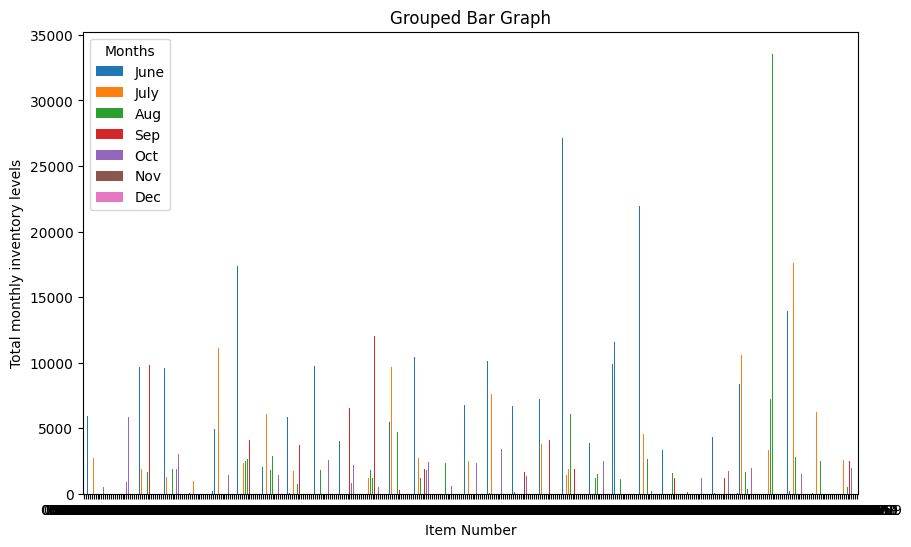

In [57]:
ax = monthly_df.plot(kind='bar', x='Items', y=['June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rot=0, figsize=(10, 6))
plt.xlabel('Item Number')
plt.ylabel('Total monthly inventory levels')
plt.title('Grouped Bar Graph')
plt.legend(title='Months')
plt.show()